## 数据处理

#### 数据加载

* 实现自定义的数据集需要继承Dataset，并实现`__getitem()__`和`__len__`方法。

* `__getitem__`:返回一条数据或一个样本，`obj[index]`等价于`obj.__getitem__(index)`

* `__len__`:返回样本的数量。`len(obj)等价于obj.__len__()`。

In [6]:
%env LS_COLORS = None
!tree --charset ascii  data/dogcat/

env: LS_COLORS=None
参数太多 - ascii


In [8]:
import torch as t
from torch.utils import data

In [9]:
import os
from PIL import Image
import numpy as np

In [12]:
class DogCat(data.Dataset):
    def __init__(self,root):
        imgs = os.listdir(root)
        
        #所有图片的绝对路径，调用__getitem__时，才真正读图片
        self.imgs = [os.path.join(root,img) for img in imgs]
        
    def __getitem__(self,index):
        img_path = self.imgs[index]
        # dog -> 1, cat -> 0
        label = 1 if 'dog' in img_path.split('/')[-1] else 0
        
        pil_img = Image.open(img_path)
        array = np.asarray(pil_img)
        data = t.from_numpy(array)
        return data,label
    
    def __len__(self):
        return len(self.imgs)

In [16]:
dataset = DogCat('./data/dogcat/')
img,label = dataset[0]
for img,label in  dataset:
    print(img.size(),img.float().mean(),label)

torch.Size([500, 497, 3]) tensor(106.4915) 0
torch.Size([499, 379, 3]) tensor(171.8085) 0
torch.Size([236, 289, 3]) tensor(130.3004) 0
torch.Size([374, 499, 3]) tensor(115.5177) 0
torch.Size([375, 499, 3]) tensor(116.8138) 1
torch.Size([375, 499, 3]) tensor(150.5079) 1
torch.Size([377, 499, 3]) tensor(151.7174) 1
torch.Size([400, 300, 3]) tensor(128.1550) 1


`Resize`:调整图片尺寸

`CenterCrop、RandomCrop、RandomSizedCrop`:裁剪图片

`Pad`：填充

`ToTensor`：将PIL Image对象转成Tensor，会自动将[0,255]归一化至[0,1]。

In [17]:
from torchvision import transforms as T
import numpy as np

In [18]:
transform = T.Compose([
    T.Resize(224), # 缩放图片
    T.CenterCrop(224), # 将图片从中切出224 * 224的图片
    T.ToTensor(), # 将图片转成Tensor，归一化至[0,1]
    T.Normalize(mean=[.5,.5,.5],std = [.5,.5,.5])# 标准化至[-1,1]
])

In [19]:
class DogCat(data.Dataset):
    def __init__(self,root,transforms=None):
        imgs = os.listdir(root)
        self.imgs = [os.path.join(root,img) for img in imgs]
        self.transforms = transforms
        
    def __getitem__(self,index):
        img_path = self.imgs[index]
        label = 0 if 'dog' in img_path.split('/')[-1] else 1
        data = Image.open(img_path)
        if self.transforms:
            data = self.transforms(data)
            
        return data,label
    
    def __len__(self):
        return len(self,imgs)
    
dataset = DogCat('./data/dogcat/',transforms=transform)
img,label = dataset[0]
for img,label in dataset:
    print(img.size(),label)

torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0


In [21]:
!tree --charset ASCII data/dogcat_2/

参数太多 - ASCII


In [23]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder('data/dogcat_2/')

In [24]:
dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [25]:
#所有图片的路径和label
dataset.imgs

[('data/dogcat_2/cat\\cat.12484.jpg', 0),
 ('data/dogcat_2/cat\\cat.12485.jpg', 0),
 ('data/dogcat_2/cat\\cat.12486.jpg', 0),
 ('data/dogcat_2/cat\\cat.12487.jpg', 0),
 ('data/dogcat_2/dog\\dog.12496.jpg', 1),
 ('data/dogcat_2/dog\\dog.12497.jpg', 1),
 ('data/dogcat_2/dog\\dog.12498.jpg', 1),
 ('data/dogcat_2/dog\\dog.12499.jpg', 1)]

In [27]:
dataset[0][1]# 一维是第几张图，二维为1返回label

0

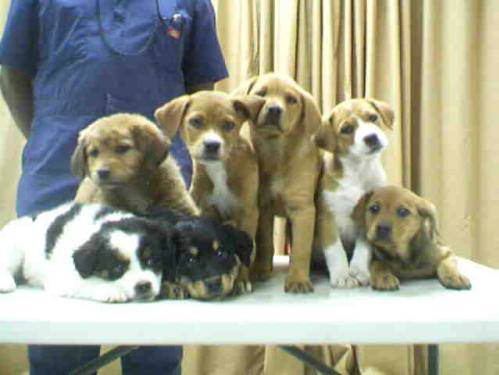

In [30]:
dataset[5][0]# 一维是第几张图，二维为0返回图片

In [31]:
normalize = T.Normalize(mean=[0.4,0.4,0.4],std = [0.2,0.2,0.2])
transform = T.Compose([
    T.RandomCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    normalize,
])

In [32]:
dataset = ImageFolder('data/dogcat_2/',transform=transform)

In [34]:
dataset[0][0].size()# 通道数 * 高 * 宽

torch.Size([3, 224, 224])

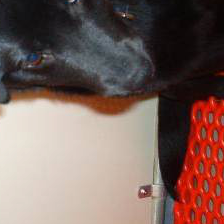

In [37]:
to_img = T.ToPILImage()
to_img(dataset[6][0] * 0.2 + 0.4)# 0.2是标准差，0.4是均值

```python
DataLoader（dateset,batch_size=1,shuffle=False,sampler=None,num_workers=0,collate_fn=default_collate,pin_memory=False,drop+last=False）
```

`dataset`：加载的数据集

`batch_size`：每次加载的大小

`shuffle`：是否将数据打乱

`sampler`：样本抽样

`num_workers`：使用多进程加载的进程数，0代表不使用多进程

`pin_memory`：是否将数据保存在pin memory区

`collate_fn`：一般使用默认拼接方式

`drop_last`：将不足一个batch的数据丢弃